<a href="https://colab.research.google.com/github/myke11j/fast-ai-deep-learning-course/blob/master/Lesson_2_Image_classification_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [0]:
# from fastai.vision import * # never use in production
from fastai.vision.data import download_images, verify_images, ImageDataBunch
from fastai.vision.learner import create_cnn
from fastai.vision.models import resnet34, resnet50

# Collect and store data on server machine

To download links of all images shown in google search

```
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```



In [0]:
folders_to_create = ['black', 'grizzly', 'teddys']
for folder in folders_to_create:
  path = Path('data/bears')
  dest = path/folder
  dest.mkdir(parents=True, exist_ok=True)

In [30]:
path.ls()

[PosixPath('data/bears/black'),
 PosixPath('data/bears/teddys'),
 PosixPath('data/bears/grizzly')]

Now we will upload files of urls from google image search. Doesn't matter what is the name of file in your local machine, we will rename it in next step anyway.

Run below cell, as many times to upload multiple files

In [35]:
from google.colab import files
uploaded = files.upload()

Saving teddy-bear-urls.csv to teddy-bear-urls.csv


In [0]:
!rm -rf teddys

Edit the below shell command to move correct files

In [0]:
!mv teddy-bear-urls.csv data/bears/teddys/urls_teddys.csv
!mv grizzly-teddy-bears-urls.csv data/bears/grizzly/urls_grizzly.csv
!mv black-teddy-bears.csv data/bears/black/urls_black.csv

In [38]:
path.ls()

[PosixPath('data/bears/black'),
 PosixPath('data/bears/teddys'),
 PosixPath('data/bears/grizzly')]

In [0]:
classes = ['teddys','grizzly','black']

In [86]:
file = 'urls_teddys.csv'
folder = 'teddys'
download_images(path/folder/file, path/folder, max_pics=200, max_workers=0)

file = 'urls_black.csv'
folder = 'black'
download_images(path/folder/file, path/folder, max_pics=200, max_workers=0)

file = 'urls_grizzly.csv'
folder = 'grizzly'
download_images(path/folder/file, path/folder, max_pics=200, max_workers=0)

Error https://www.therussianstore.com/media/catalog/product/cache/1/small_image/280x/9df78eab33525d08d6e5fb8d27136e95/k/b/kb00227a01.jpg HTTPSConnectionPool(host='www.therussianstore.com', port=443): Max retries exceeded with url: /media/catalog/product/cache/1/small_image/280x/9df78eab33525d08d6e5fb8d27136e95/k/b/kb00227a01.jpg (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:852)'),))

 Download of http://www.romolagarai.org/imgs/full/15/152839_grizzly-bear-png.png has failed after 5 retries
 Fix the download manually:
$ mkdir -p /root/.fastai/data
$ cd /root/.fastai/data
$ wget -c http://www.romolagarai.org/imgs/full/15/152839_grizzly-bear-png.png
$ tar -zxvf 152839_grizzly-bear-png.png

And re-run your code once the download is successful



SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [0]:
print(classes)
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [89]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['black', 'grizzly', 'teddys'], 3, 300, 74)

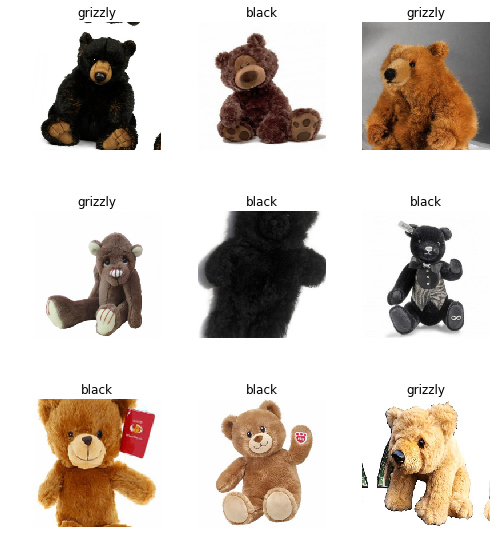

In [91]:
data.show_batch(rows=3, figsize=(7,8))

# Train the model resnet34 vs resnet50

In [95]:
learner = create_cnn(data, resnet34, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 108558187.31it/s]


In [96]:
learner.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.514347,1.014261,0.527027,00:09
1,1.124750,1.244572,0.472973,00:07
2,0.928675,1.220570,0.432432,00:07
3,0.807999,1.188843,0.418919,00:07


In [0]:
learner.save('stage-1')


In [0]:
learner.unfreeze()


In [100]:
learner.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


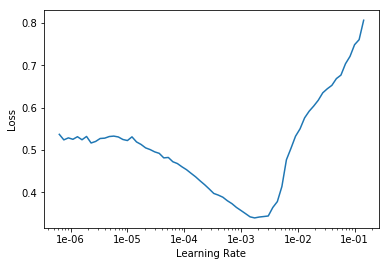

In [101]:
learner.recorder.plot()

In [105]:
learner.fit_one_cycle(2, max_lr=slice(1e-05, 1e-02))

epoch,train_loss,valid_loss,error_rate,time
0,0.235341,1.430797,0.351351,00:07
1,0.251484,1.720429,0.364865,00:07


In [108]:
learner2 = create_cnn(data, resnet50, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:00<00:00, 107874354.07it/s]


In [109]:
learner2.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.165558,1.142527,0.486486,00:19
1,0.973264,1.419812,0.486486,00:09
2,0.795956,1.448720,0.445946,00:09
3,0.690057,1.480553,0.418919,00:09
